# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Robert Varian]
- **Email:** [mc827d5y0604@student.devacademy.id]
- **ID Dicoding:** [MC827D5Y0604]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Station manakah yang memiliki kualitas udara terbaik?
- Pertanyaan 2 : Station manakah yang memiliki tingkat partikel matter tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import streamlit as st
import datetime

## Data Wrangling

### Gathering Data

In [ ]:
aotizhongxin_df = pd.read_csv("/content/sample_data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("/content/sample_data/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("/content/sample_data/PRSA_Data_Dingling_20130301-20170228.csv")

dfs = [
    aotizhongxin_df,
    changping_df,
    dingling_df
]

all_df = pd.concat(dfs, ignore_index=True).reset_index()
all_df

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,105187,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
105188,105188,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
105189,105189,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
105190,105190,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


**Insight:**
- Mengekstrak data dari beberapa dataset kota (aotizhongxin, changping, dan dingling).

### Assessing Data

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    105192 non-null  int64  
 1   No       105192 non-null  int64  
 2   year     105192 non-null  int64  
 3   month    105192 non-null  int64  
 4   day      105192 non-null  int64  
 5   hour     105192 non-null  int64  
 6   PM2.5    102714 non-null  float64
 7   PM10     103236 non-null  float64
 8   SO2      102899 non-null  float64
 9   NO2      102268 non-null  float64
 10  CO       99883 non-null   float64
 11  O3       101655 non-null  float64
 12  TEMP     105066 non-null  float64
 13  PRES     105072 non-null  float64
 14  DEWP     105066 non-null  float64
 15  RAIN     105070 non-null  float64
 16  wd       104831 non-null  object 
 17  WSPM     105092 non-null  float64
 18  station  105192 non-null  object 
dtypes: float64(11), int64(6), object(2)
memory usage: 15.2+ MB


**Insight:**
- Ditemukan kekurangan data pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM.

In [ ]:
all_df.isna().sum()

,0
index,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,2478
PM10,1956
SO2,2293
NO2,2924


**Insight:**
- Menemukan kolom data yang memiliki data hilang beserta total data yang hilang dalam datasets.

In [ ]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())
all_df.describe(include="all")

Jumlah duplikasi:  0


,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,105192.000000,105192.000000,105192.000000,105192.00000,105192.000000,105192.000000,102714.000000,103236.000000,102899.000000,102268.000000,99883.000000,101655.000000,105066.000000,105072.000000,105066.000000,105070.000000,104831,105092.000000,105192
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11141,NaN,35064
mean,52595.500000,17532.500000,2014.662560,6.52293,15.729637,11.500000,73.274027,96.143238,14.689739,43.726067,1107.307420,60.952020,13.652255,1009.123270,2.045023,0.062719,NaN,1.805363,NaN
std,30366.459096,10122.153028,1.177202,3.44872,8.800134,6.922219,76.033342,86.990012,20.141019,33.896091,1094.581622,55.606775,11.376585,10.464315,13.798774,0.808716,NaN,1.277345,NaN
min,0.000000,1.000000,2013.000000,1.00000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,NaN,0.000000,NaN
25%,26297.750000,8766.750000,2014.000000,4.00000,8.000000,5.750000,17.000000,32.000000,2.000000,18.000000,400.000000,17.000000,3.300000,1000.600000,-9.600000,0.000000,NaN,1.000000,NaN
50%,52595.500000,17532.500000,2015.000000,7.00000,16.000000,11.500000,48.000000,72.000000,7.000000,35.000000,800.000000,51.000000,14.600000,1008.700000,2.500000,0.000000,NaN,1.500000,NaN
75%,78893.250000,26298.250000,2016.000000,10.00000,23.000000,17.250000,103.000000,135.000000,18.000000,63.000000,1400.000000,85.000000,23.300000,1017.400000,14.700000,0.000000,NaN,2.300000,NaN


**Insight:**
- Tidak ada duplikasi pada dataset.
- Terdapat beberapa keanehan data pada max PM2.5, max PM10, max SO2, max CO, max NO2, max O3,

### Cleaning Data

In [ ]:
all_df["PM2.5"].fillna(value=all_df["PM2.5"].mean(), inplace=True)

all_df["PM10"].fillna(value=all_df["PM10"].mean(), inplace=True)

all_df.SO2.fillna(value=all_df.SO2.mean(), inplace=True)

all_df.NO2.fillna(value=all_df.NO2.mean(), inplace=True)

all_df.CO.fillna(value=all_df.CO.mean(), inplace=True)

all_df.O3.fillna(value=all_df.O3.mean(), inplace=True)

all_df.TEMP.fillna(value=all_df.TEMP.mean(), inplace=True)

all_df.PRES.fillna(value=all_df.PRES.mean(), inplace=True)

all_df.DEWP.fillna(value=all_df.DEWP.mean(), inplace=True)

all_df.RAIN.fillna(value=all_df.RAIN.mean(), inplace=True)

all_df.WSPM.fillna(value=all_df.WSPM.mean(), inplace=True)

all_df.wd.fillna(value=all_df.wd.mode().iloc[0], inplace=True)

all_df.isna().sum()

<ipython-input-355-bf48bc61ccb8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["PM2.5"].fillna(value=all_df["PM2.5"].mean(), inplace=True)
<ipython-input-355-bf48bc61ccb8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
index,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0


**Insight:**
- Mengganti nilai yang hilang dengan nilai rata-rata yang ada.
- Untuk wd (wind direction) karena bertipe string digunakan modus untuk mengganti nilai yang hilang dengan nilai yang banyak muncul.
- Setelah ini data sudah siap untuk diolah atau digunakan untuk mencari informasi yang dikandung di dalamnya.
- Alasan mengganti nilai number yang hilang dengan nilai rata-rata adalah karena mengasumsikan nilainya berada di tengah-tengah atau pada umumnya.
- Alasan mengganti nilai string dengan nilai yang terbanyak muncul adalah mengasumsikan bahwa nilai kosong tersebut sebenarnya adalah nilai yang dihasilkan pada umumnya atau kebanyakan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
all_df.groupby(by="station").agg({
    "station" : "nunique",
    "PM2.5" : ["max", "min", "mean", "std"],
})

station  PM2.5                           
             nunique    max  min       mean        std
station                                               
Aotizhongxin       1  898.0  3.0  82.523009  81.059337
Changping          1  882.0  2.0  71.147738  71.524893
Dingling           1  881.0  3.0  66.151334  71.468488

**Insight:**
## Partikel matter 2.5
- Aotizhongxin memiliki rata-rata tertinggi dibandingkan station lainnya serta nilai terkecil yang didapat juga yang tertinggi.
- Changping memiliki rata-rata kedua tertinggi dibandingkan dengan station lainnya namun nilai terkecil yang didapat merupakan niali terkecil yang ada.
- Dinglin memiliki rata-rata terendah dibandingkan yang lain namun nilai terkecil yang didapat merupakan nilai tertinggi.

### Summary
Dari data yang dilihat station Dingling merupakan station dengan partikel matter 2.5 terkecil karena terlihat pada data rata-rata yang didapat berupa 66,151 sedangkan untuk Changping mendapatkan rata-rata berupa 71,147 dan station Aotizhongxin mendapatkan rata-rata berupa 82,523. Maka dapat dikatakan station Dingling merupakan station dengan partikel matter 2.5 terkecil.

In [ ]:
all_df.groupby(by="station").agg({
    "station" : "nunique",
    "PM10" : ["max", "min", "mean", "std"]
  })

station   PM10                            
             nunique    max  min        mean        std
station                                                
Aotizhongxin       1  984.0  2.0  109.775412  94.263610
Changping          1  999.0  2.0   94.682525  82.746546
Dingling           1  905.0  2.0   83.971776  78.812013

**Insight:**
## Partikel matter 10
- Aotizhongxin memiliki nilai rata-rata tertinggi dibandingkan station lain namun nilai maksimumnya kedua tertinggi dibandingkan data yang lain.
- Changping memiliki nilai rata-rata kedua tertinggi dibandingkan station lain namun nilai maksimumnya merupakan nilai tertinggi yang ada.
- Dingling memiliki nilai rata-rata terendah dibandingkan station lain dan memiliki nilai max terendah.

### Summary
Dari data yang dilihat, station Dingling memiliki nilai partikel matter 10 terkecil karena terlihat pada data rata-rata yang berupa 83,971 dan max yang didapat berupa 905 sedangkan untuk station Changping didapatkan nilai rata-rata berupa 94,682 dan nilai max berupa 999 dan station Aotizhongxin memiliki nilai rata-rata berupa 109,775 dan nilai max berupa 984. Dari data tersebutlah yang membuat station Dingling yang merupakan station dengan nilai partikel matter 10 terkecil dibandingkan data lainnya.

In [ ]:
all_df.groupby(by="station").agg({
    "station" : "nunique",
    "SO2" : ["max", "min", "mean", "std"]
})

station    SO2                              
             nunique    max     min       mean        std
station                                                  
Aotizhongxin       1  341.0  0.2856  17.304273  22.520816
Changping          1  310.0  0.2856  14.954085  20.786673
Dingling           1  156.0  0.2856  11.810860  15.362593

**Insight:**
## SO2
- Aotizhongxin memiliki nilai rata-rata tertinggi dibandingkan data lainnya serta nilai maksimumnya merupakan nilai tertinggi.
- Changping memiliki nilai rata-rata kedua tertinggi dibandingkan data lainnya serta nilai maksimumnya merupakan nilai tertinggi.
- Dingling memiliki nilai rata-rata terendah dibandingkan data lainnya serta nilai maksimumnya merupakan nilai terendah yang ada.

### Summary
Dari data yang terlihat, station Dingling memiliki nilai SO2 terendah karena terlihat pada nilai rata-rata yang berupa 11,810 dan max yang berupa 156 sedangkan untuk station Changping rata-rata yang berupa 14,954 dan max yang berupa 310 dan untuk station Aotizhongxin memiliki nilai rata-rata berupa 17,304 dan nilai maksimum yang didapat berupa 341. Dari data tersebut dapat dilihat bahwa Dingling memiliki nilai SO2 terendah dibandingkan station Aotizhongxin dan Changping.

In [ ]:
all_df.groupby(by="station").agg({
    "station" : "nunique",
    "NO2" : ["max", "min", "mean", "std"]
})

station    NO2                              
             nunique    max     min       mean        std
station                                                  
Aotizhongxin       1  290.0  2.0000  58.851290  36.664618
Changping          1  226.0  1.8477  44.173411  29.237738
Dingling           1  205.0  1.0265  28.153500  26.085561

**Insight:**
## NO2
- Aotizhongxin memiliki nilai rata-rata tertinggi dibandingkan data lainnya serta nilai minimum dan maksimumnya juga yang tertinggi dari data yang ada.
- Changping memiliki nilai rata-rata kedua tertinggi dibandingkan data lainnya serta nilai minimum dan maksimumnya juga merupakan nilai tertinggi kedua.
- Dingling memiliki nilai rata-rata, minimum dan maksimum terendah dibandingkan data lainnya.

### Summary
Dari data yang terlihat, station Dingling memiliki nilai NO2 terendah karena terlihat pada nilai rata-rata yang berupa 28,153, maksimum yang berupa 205 dan minimum data yang berupa 1,026 sedangkan untuk station Changping terdapat nilai rata-rata yang berupa 44,173, nilai maksimum yang berupa 226 dan nilai minimum yang berupa 1,847 dan untuk station Aotizhongxin nilai maksimumnya berupa 290, nilai minimumnya berupa 2 dan nilai rata-ratanya yang berupa 290. Dari data tersebut dapat kita pastikan bahwa station Dingling merupakan station yang memiliki kandungan NO2 terendah dibandingkan station yang dibandingkan.

In [ ]:
all_df.groupby(by="station").agg({
    "station" : "nunique",
    "CO" : ["max", "min", "mean", "std"]
})

station       CO                                 
             nunique      max    min         mean          std
station                                                       
Aotizhongxin       1  10000.0  100.0  1255.062057  1190.589644
Changping          1  10000.0  100.0  1150.349606  1078.905200
Dingling           1  10000.0  100.0   916.510596   878.268933

**Insight:**
## CO
- Aotizhongxin memiliki nilai rata-rata tertinggi dibandingkan data lainnya.
- Changping memiliki nilai rata-rata kedua tertinggi dibandingkan data lainnya.
- Dingling memiliki nilai rata-rata terendah dibandingkan data lainnya.

### Summary
Dari data yang terlihat, station Dingling memiliki nilai CO terendah dibandingkan data yang lain terlihat pada data rata-ratanya yang berupa 916,51 sedangkan untuk rata-rata station Changping yang berupa 1150,349 dan rata-rata station Aotizhongxin yang berupa 1255,062. Terlihat bahwa dari data tersebut station Dingling merupakan station dengan nilai kandungan CO terendah dibandingkan station lainnya.

In [ ]:
all_df.groupby(by="station").agg({
    "station" : "nunique",
    "O3" : ["max", "min", "mean", "std"]
})

station     O3                              
             nunique    max     min       mean        std
station                                                  
Aotizhongxin       1  423.0  0.2142  56.578806  56.487510
Changping          1  429.0  0.2142  57.991887  53.848235
Dingling           1  500.0  0.2142  68.285367  52.843724

**Insight:**
## O3
- Aotizhongxin memiliki nilai rata-rata terendah dibandingkan data lainnya serta memiliki nilai maksimum terendah.
- Changping memiliki nilai rata-rata kedua tertinggi dibandingkan data lainnya serta memiliki nilai maksimum kedua tertinggi.
- Dingling memiliki nilai rata-rata tertinggi serta memiliki nilai maksimum tertinggi dibandingkan data lainnya

### Summary
Dari data yang terlihat, station Aotizhongxin memiliki nilai O3 terendah dibandingkan data lainnya karena memiliki nilai rata-rata terendah dan maksimum terendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Station manakah yang memiliki kualitas udara terbaik?

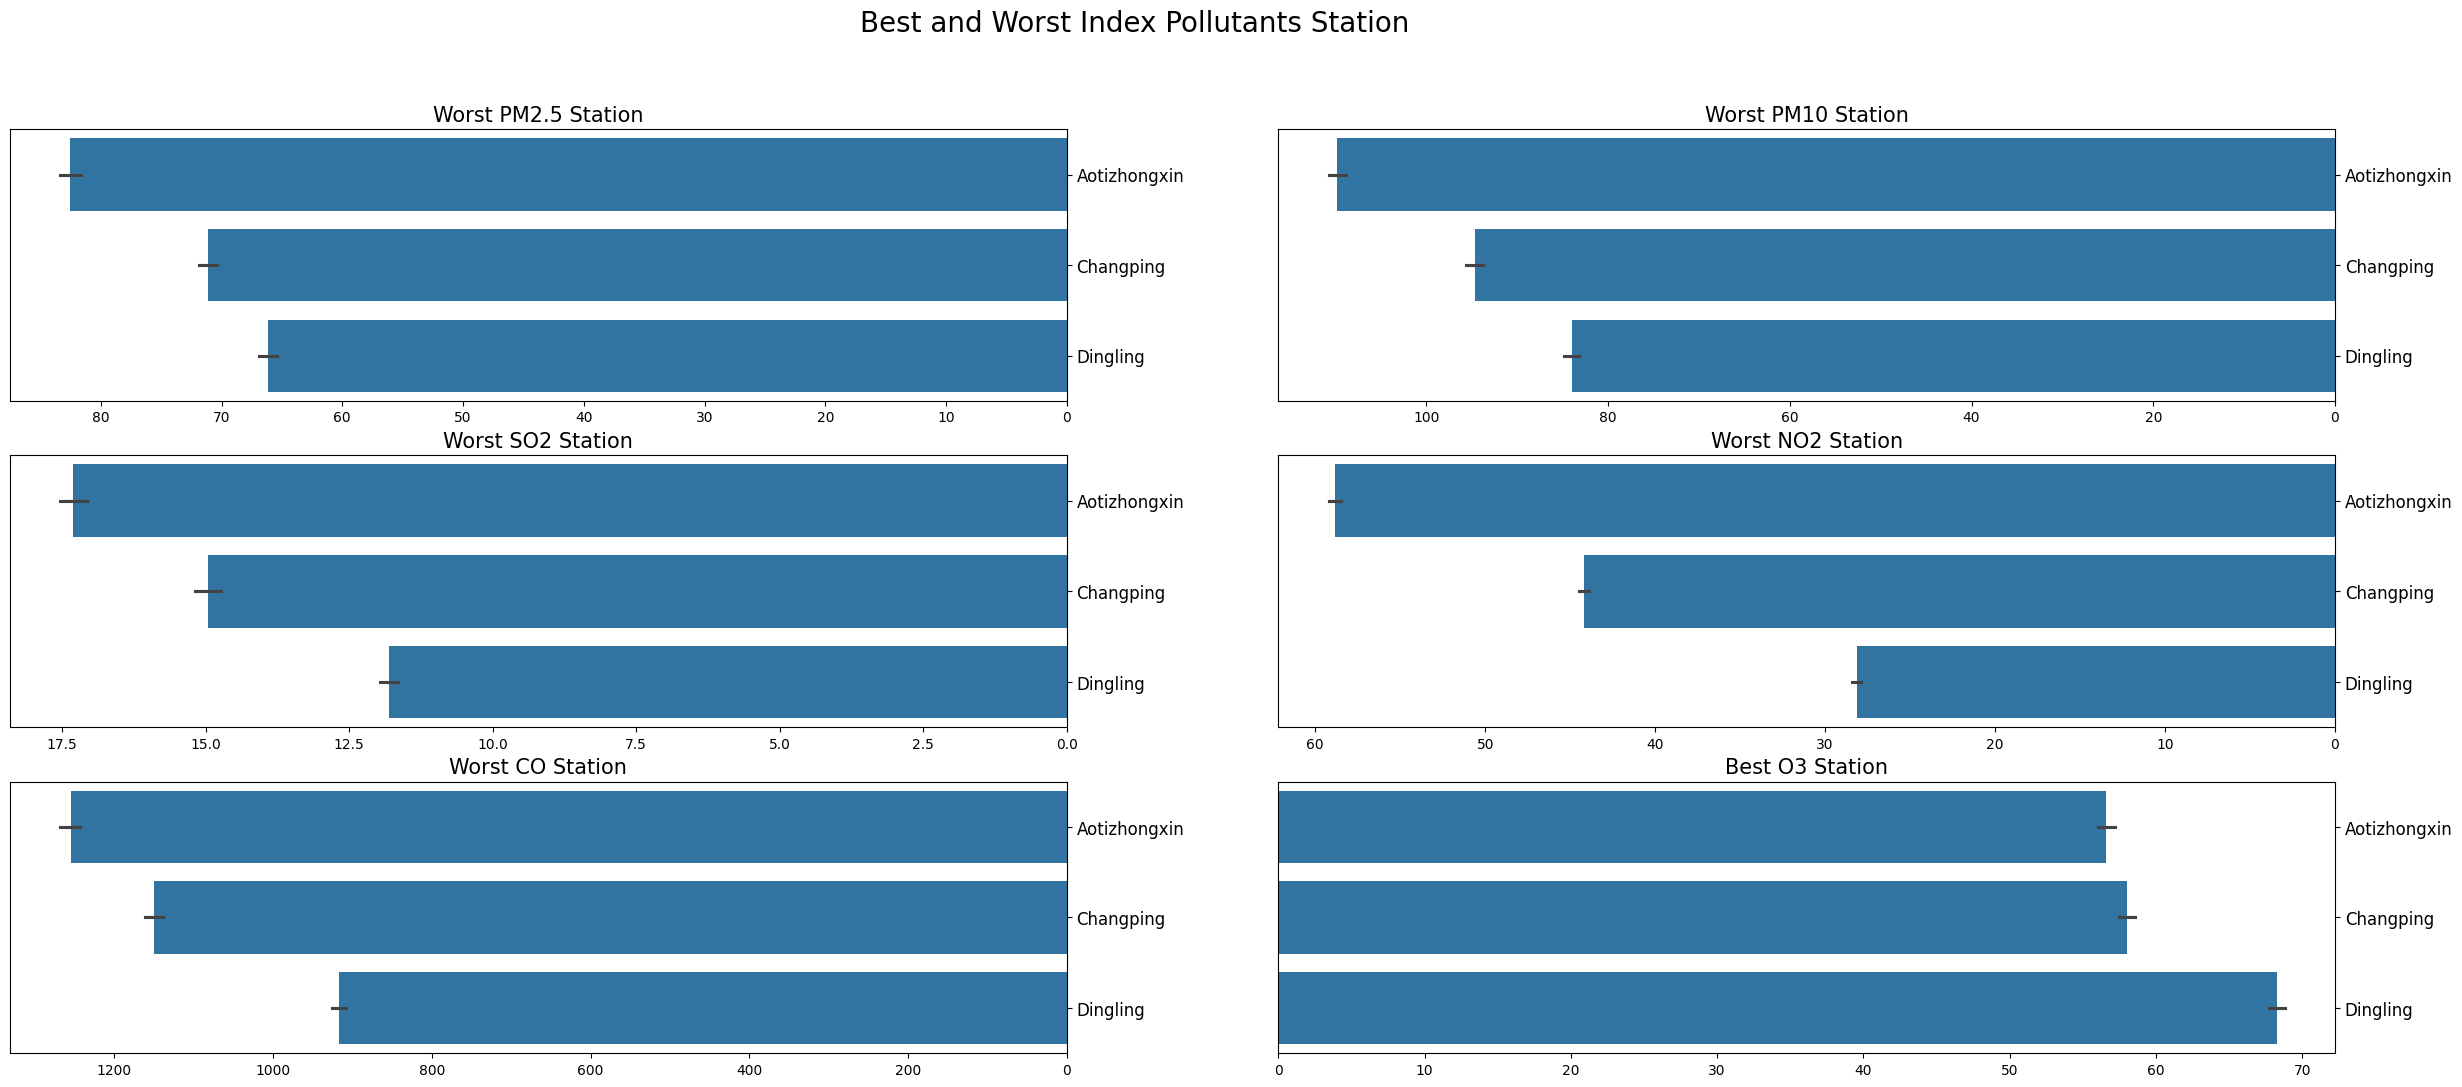

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 12))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=all_df['PM2.5'], y=all_df['station'], data=all_df.sort_values(by='PM2.5', ascending=True).head(5), palette=colors, ax=ax[0,0])
ax[0,0].set_ylabel(None)
ax[0,0].set_xlabel(None)
ax[0,0].invert_xaxis()
ax[0,0].yaxis.set_label_position("right")
ax[0,0].yaxis.tick_right()
ax[0,0].set_title("Worst PM2.5 Station", loc="center", fontsize=15)
ax[0,0].tick_params(axis='y', labelsize=12)

sns.barplot(x=all_df['PM10'], y=all_df['station'], data=all_df.sort_values(by='PM10', ascending=True).head(5), palette=colors, ax=ax[0,1])
ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel(None)
ax[0,1].invert_xaxis()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_title("Worst PM10 Station", loc="center", fontsize=15)
ax[0,1].tick_params(axis='y', labelsize=12)

sns.barplot(x=all_df['SO2'], y=all_df['station'], data=all_df.sort_values(by='SO2', ascending=True).head(5), palette=colors, ax=ax[1,0])
ax[1,0].set_ylabel(None)
ax[1,0].set_xlabel(None)
ax[1,0].invert_xaxis()
ax[1,0].yaxis.set_label_position("right")
ax[1,0].yaxis.tick_right()
ax[1,0].set_title("Worst SO2 Station", loc="center", fontsize=15)
ax[1,0].tick_params(axis='y', labelsize=12)

sns.barplot(x=all_df['NO2'], y=all_df['station'], data=all_df.sort_values(by='NO2', ascending=True).head(5), palette=colors, ax=ax[1,1])
ax[1,1].set_ylabel(None)
ax[1,1].set_xlabel(None)
ax[1,1].invert_xaxis()
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_title("Worst NO2 Station", loc="center", fontsize=15)
ax[1,1].tick_params(axis='y', labelsize=12)

sns.barplot(x=all_df['CO'], y=all_df['station'], data=all_df.sort_values(by='CO', ascending=True).head(5), palette=colors, ax=ax[2,0])
ax[2,0].set_ylabel(None)
ax[2,0].set_xlabel(None)
ax[2,0].invert_xaxis()
ax[2,0].yaxis.set_label_position("right")
ax[2,0].yaxis.tick_right()
ax[2,0].set_title("Worst CO Station", loc="center", fontsize=15)
ax[2,0].tick_params(axis='y', labelsize=12)

sns.barplot(x=all_df['O3'], y=all_df['station'], data=all_df.sort_values(by='O3', ascending=False).head(5), palette=colors, ax=ax[2,1])
ax[2,1].set_ylabel(None)
ax[2,1].set_xlabel(None)
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_title("Best O3 Station", loc="center", fontsize=15)
ax[2,1].tick_params(axis='y', labelsize=12)


plt.suptitle("Best and Worst Index Station", fontsize=20)
plt.show()

**Insight:**
# Summary
- Terlihat bahwa station terbaik yang ada adalah station Dingling karena tingkat PM2.5, PM10, SO2, CO, NO2 yang rendah.
- Station kedua terbaik adalah Changping yang dimana tingkat PM2.5, PM10, SO2, CO, NO2, O3 yang tidak terlalu tinggi.
- Station terburuk jatuh kepada Aotizhongxin yang dimana tingkat PM2.5, PM10, SO2, CO, NO2 yang sangat tinggi.

### Pertanyaan 2:  Station manakah yang memiliki tingkat partikel matter tertinggi?

<ipython-input-363-897a4e2c6402>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_df['PM2.5'], y=all_df['station'], data=all_df.sort_values(by='PM2.5', ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-363-897a4e2c6402>:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=all_df['PM2.5'], y=all_df['station'], data=all_df.sort_values(by='PM2.5', ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-363-897a4e2c6402>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_df['PM10'], y=all_df['station'], data=all_df.sort_values(by='PM10', ascending=True).head(5), palette=colors, ax=ax[1])
<ipython-i

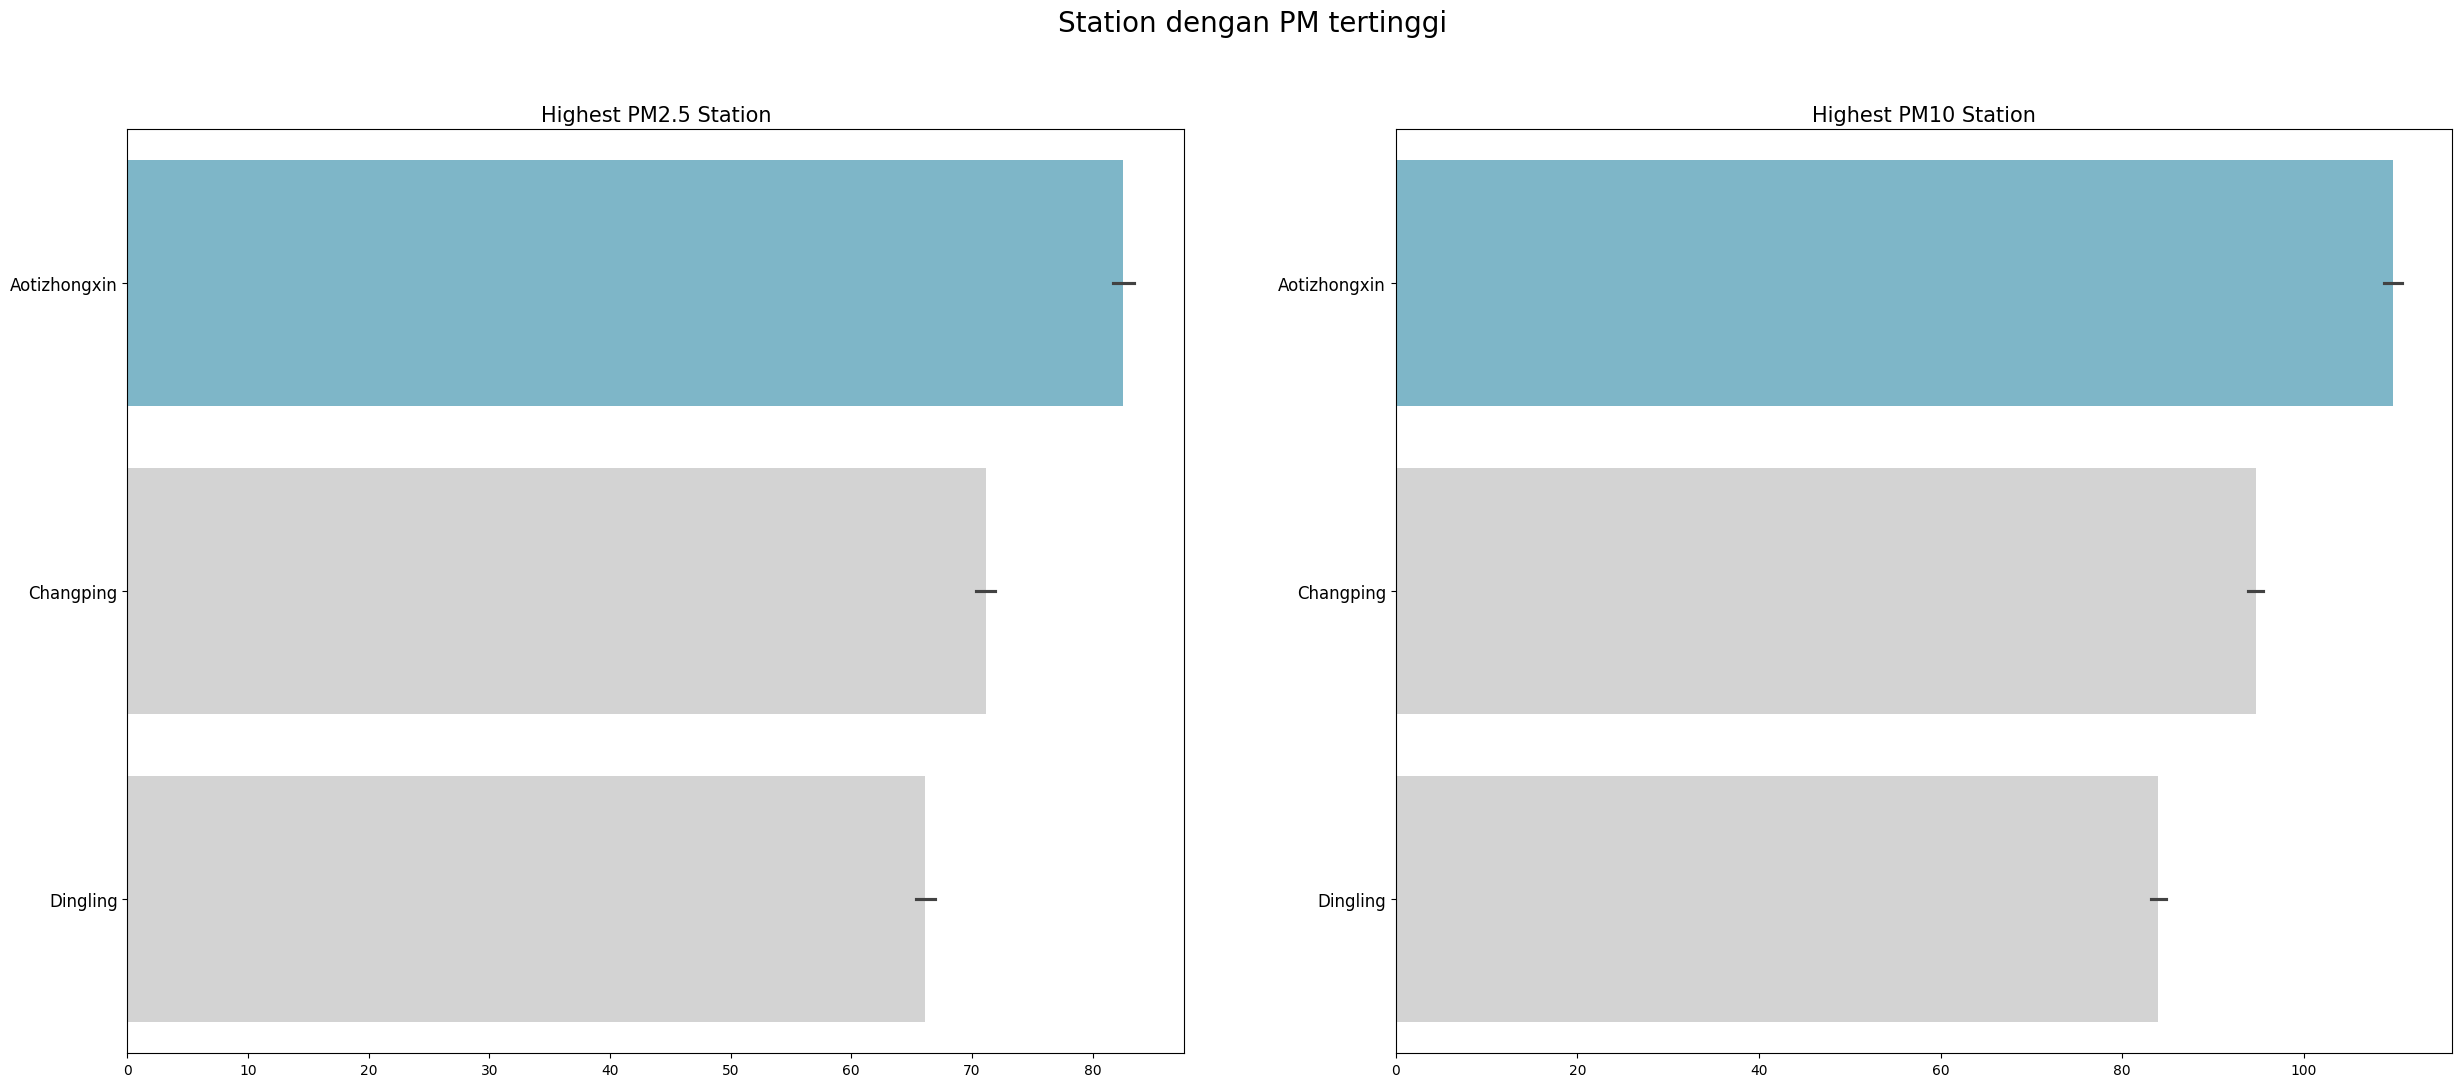

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=all_df['PM2.5'], y=all_df['station'], data=all_df.sort_values(by='PM2.5', ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Highest PM2.5 Station", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x=all_df['PM10'], y=all_df['station'], data=all_df.sort_values(by='PM10', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_title("Best PM2.5 Station", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Highest PM10 Station", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Station dengan PM tertinggi",fontsize=20)
plt.show()

**Insight:**
- Terlihat pada data tersebut dimana station dengan nilai PM tertinggi jatuh kepada station Aotizhongxin yang dimana memiliki nilai PM2.5 dan PM10 tertinggi.
- Changping mendapat urutan kedua karena PM2.5 dan PM10 berada di peringkat tengah.
- Dingling mendapat urutan terakhir dimana nilai PM keseluruhan berada di paling rendah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1 : Station dengan kualitas udara terbaik jatuh kepada Dingling karena nilai PM2.5, PM10, SO2, CO, NO2 yang rendah.
- Conclusion pertanyaan 2 : Station yang memiliki nilai partikel matter tertinggi jatuh kepada Aotizhongxin yang dimana PM2.5 dan PM10 nya memiliki nilai tertinggi dibandingkan yang lain. Bisa dikatakan station Aotizhongxin harus mewajibkan semua pengunjungnya untuk menggunakan masker karena berbahaya untuk pernapasan.

## Saran
Agar station layak untuk digunakan oleh orang banyak dibutuhkannya regulasi dan penetralan kandungan berbahaya yang terdapat pada station tersebut. Kandungan yang perlu diperhatikan adalah PM2.5, PM10, SO, CO2, NO2, O3.

In [ ]:
all_df.to_csv("all_data.csv", index=False)